In [1]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime
import copy
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ios_pedometer_cleaned.csv")
df_group = pd.read_csv('/data/meditation/majid/surveys/0.csv', skiprows=[1,2])[['Study ID','Group']]
df_group.columns = ['survey_id','group']
df_id = pd.read_csv('/home/memari/jhu_centering/tables/id.csv')
df_group = df_id.merge(df_group, on = 'survey_id', how = 'left')
df_group.rename(columns={'device_id1': 'device_id'}, inplace=True)
df_plot = df.merge(df_group[['device_id','group_x']], on = 'device_id', how = 'left')
df_plot = df_plot.drop(columns=['device_id', 'date'])

In [3]:
grouped = df_plot.groupby(['group_x'])
df_dict = {group: data for group, data in grouped}
active_control = df_dict['Active Control']
experimental_condition = df_dict['Experimental Condition']
passive_control  = df_dict['Passive Control']
active_control.columns

Index(['current_cadence', 'current_pace', 'distance', 'floors_ascended',
       'floors_descended', 'number_of_steps', 'group_x'],
      dtype='object')

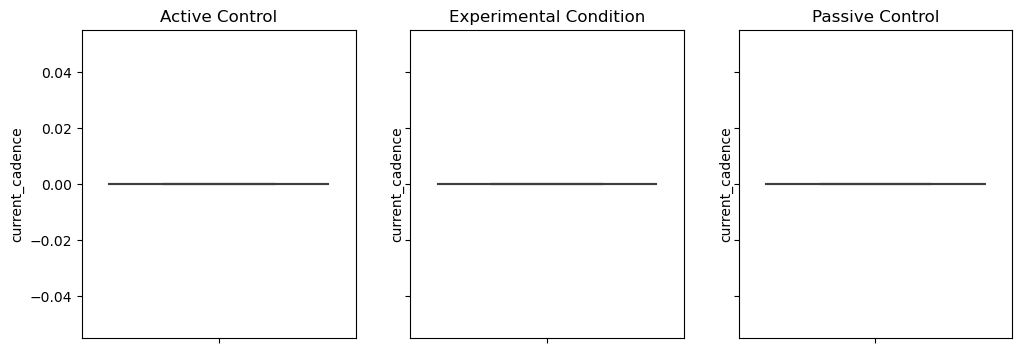

for active_control and experimental_condition: t=nan and p=nan
for active_control and passive_control: t=nan and p=nan
for experimental_condition and passive_control: t=nan and p=nan


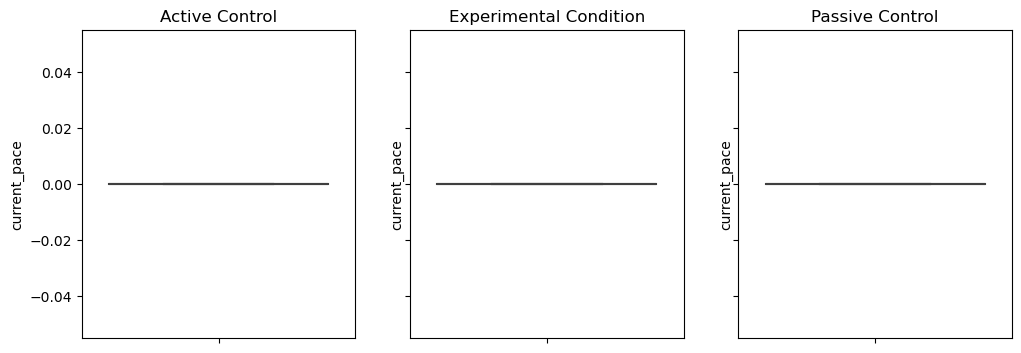

for active_control and experimental_condition: t=nan and p=nan
for active_control and passive_control: t=nan and p=nan
for experimental_condition and passive_control: t=nan and p=nan


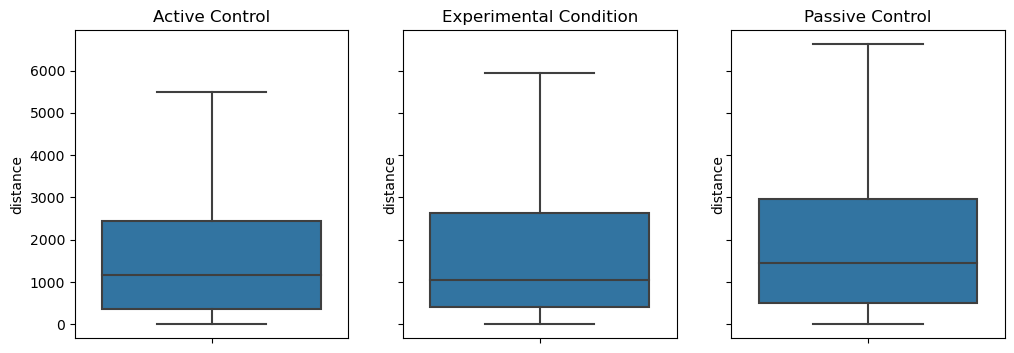

for active_control and experimental_condition: t=0.25 and p=0.80
for active_control and passive_control: t=-2.26 and p=0.02
for experimental_condition and passive_control: t=-2.46 and p=0.01


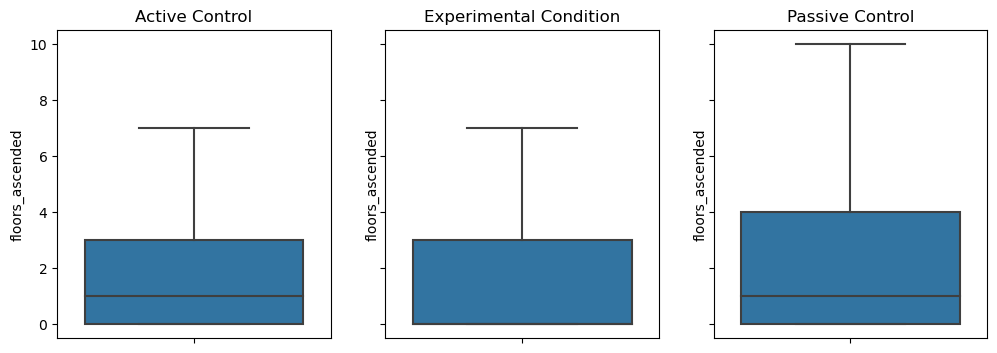

for active_control and experimental_condition: t=0.27 and p=0.79
for active_control and passive_control: t=-3.26 and p=0.00
for experimental_condition and passive_control: t=-3.50 and p=0.00


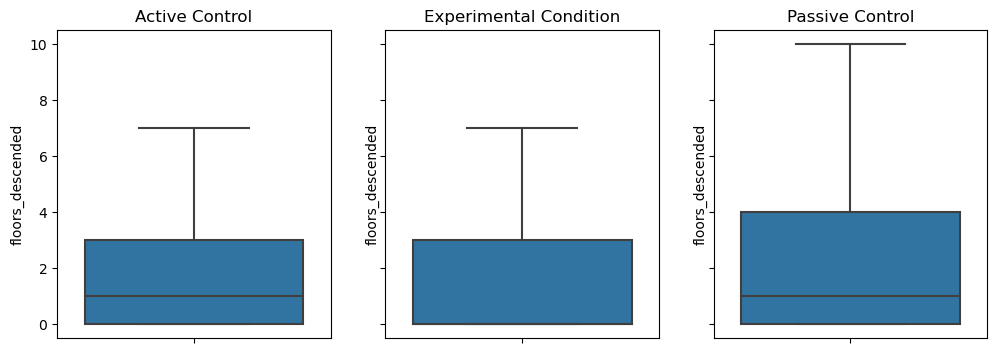

for active_control and experimental_condition: t=1.48 and p=0.14
for active_control and passive_control: t=-2.86 and p=0.00
for experimental_condition and passive_control: t=-4.10 and p=0.00


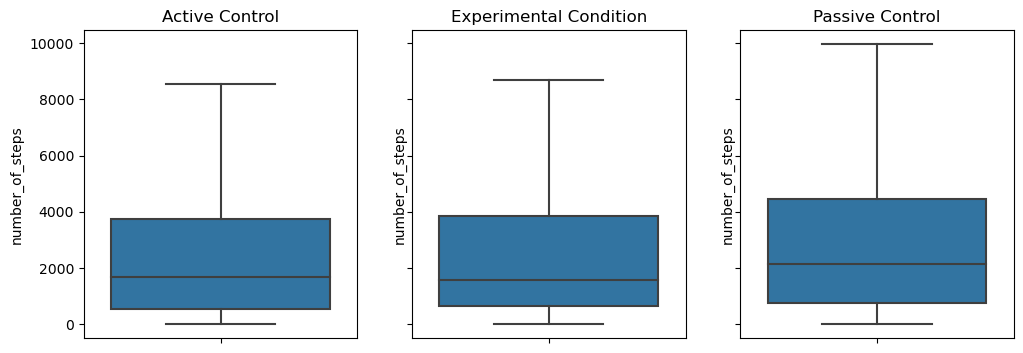

for active_control and experimental_condition: t=0.67 and p=0.50
for active_control and passive_control: t=-2.56 and p=0.01
for experimental_condition and passive_control: t=-3.15 and p=0.00


In [4]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
mylist = ['current_cadence', 'current_pace', 'distance', 'floors_ascended','floors_descended', 'number_of_steps']
for clm in mylist:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
    sns.boxplot(y=active_control[clm], orient="v",showfliers=False,ax=ax1)
    sns.boxplot(y=experimental_condition[clm], orient="v",showfliers=False,ax=ax2)
    sns.boxplot(y=passive_control[clm], orient="v",showfliers=False,ax=ax3)
    ax1.set_title("Active Control")
    ax2.set_title("Experimental Condition")
    ax3.set_title("Passive Control")
    plt.show()

    t, p = ttest_ind(active_control[clm], experimental_condition[clm])
    print('for active_control and experimental_condition: t={:.2f} and p={:.2f}'.format(t,p))
    t, p = ttest_ind(active_control[clm], passive_control[clm])
    print('for active_control and passive_control: t={:.2f} and p={:.2f}'.format(t,p))
    t, p = ttest_ind(experimental_condition[clm], passive_control[clm])
    print('for experimental_condition and passive_control: t={:.2f} and p={:.2f}'.format(t,p))